In [19]:
import config as c
import utils as u
import behav_viz.ingest as ingest
import pandas as pd

import behav_viz.visualize as viz
import behav_viz.utils as util
from behav_viz.utils import plot_utils as pu
import seaborn as sns
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 0. Load in


In [20]:
t = u.load_trials_df()

Loading trials data from directory: /Users/jessbreda/Desktop/github/jbreda_animal_training/notebooks/fixation_publication


In [21]:
min_gnp_date = (
    t.query("stage ==5 and animal_id !='R044'")
    .groupby("animal_id")
    .date.min()
    .reset_index()
)
max_gnp_date = (
    t.query("stage >6 and stage < 11 and animal_id !='R044'")
    .groupby("animal_id")
    .date.max()
    .reset_index()
)
merge_dates = pd.merge(min_gnp_date, max_gnp_date, on="animal_id", how="left")
merge_dates

,animal_id,date_x,date_y
0,R040,2024-08-01,2024-08-23
1,R041,2024-07-30,2024-08-20
2,R042,2024-07-30,2024-08-20
3,R043,2024-07-30,2024-08-16
4,R045,2024-07-30,2024-08-20
5,R046,2024-07-30,2024-08-22
6,R047,2024-08-01,2024-09-13
7,R048,2024-08-04,2024-09-25
8,R049,2024-08-07,2024-08-28
9,R050,2024-08-06,2024-09-12


In [32]:
pdf = u.load_poke_df()

Loading poke data from directory: /Users/jessbreda/Desktop/github/jbreda_animal_training/notebooks/fixation_publication


Text(0.5, 1.0, 'Failure_rate 0.31')

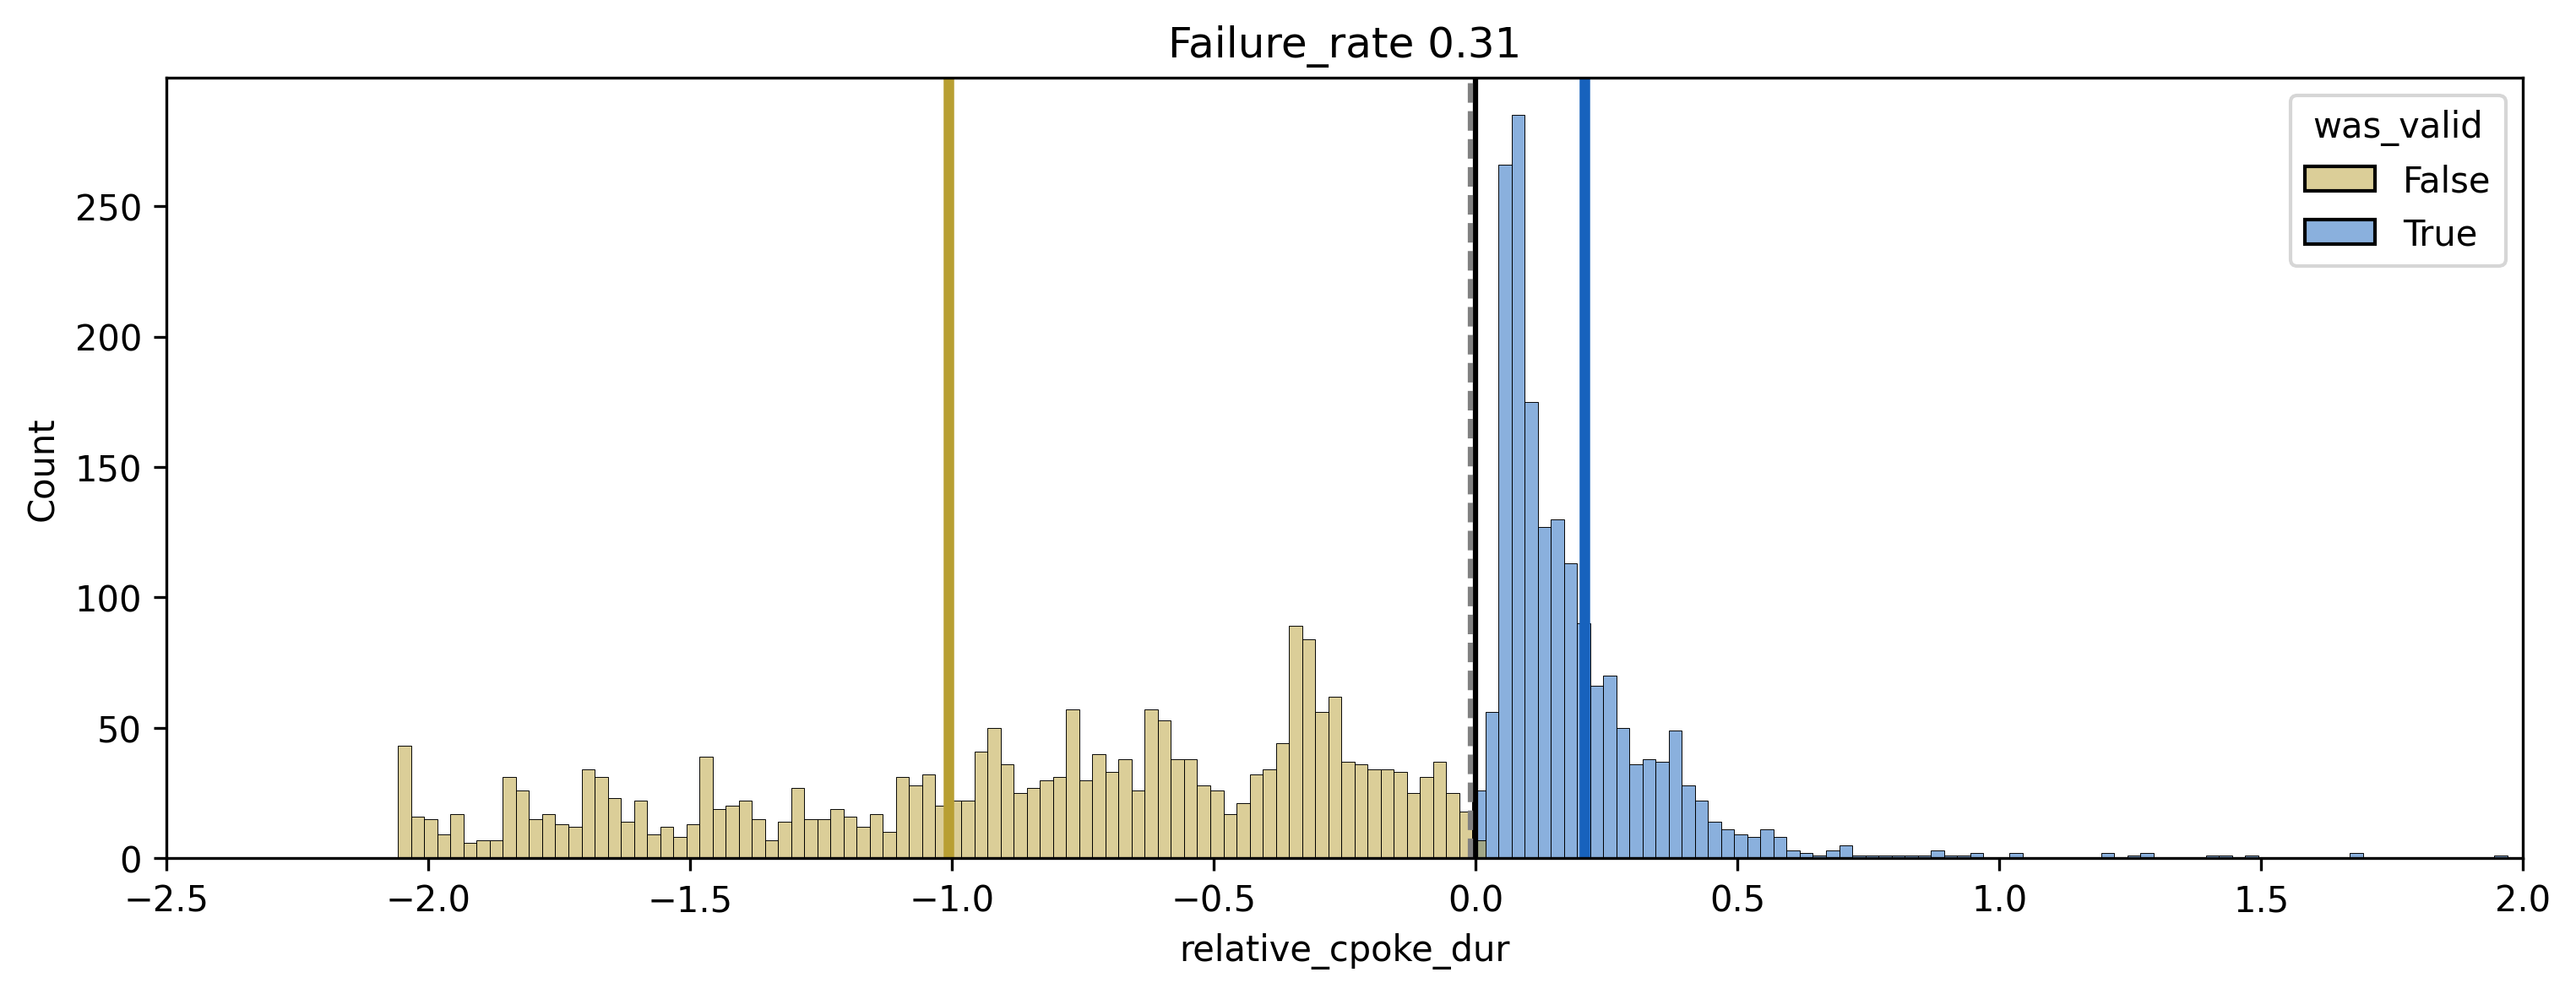

In [37]:
# pdf["relative_cpoke_dur"] = pdf["cpoke_dur"] - pdf["fixation_dur"]
# pdf["was_valid"] = (pdf["post_settling_violation"] == 0) & (
#     pdf["settling_violation"] == 0
# )
#### PLOT
fig, ax = pu.make_fig()
plot_df = pdf.copy()
pal = ["#b89f32", "#1762bd"]
sns.histplot(
    data=pdf.query("animal_id == 'R041' and stage >=5 and stage <8"),
    x="relative_cpoke_dur",
    binwidth=0.025,
    hue="was_valid",
    palette=pal,
    hue_order=[False, True],
    ax=ax,
)
failure_rate = 1 - pdf.was_valid.mean()
avg_failed_dur = plot_df.query("was_valid == False").relative_cpoke_dur.mean()
ax.axvline(avg_failed_dur, color=pal[0], lw=3, label="Avg Failed Duration")
avg_valid_dur = plot_df.query("was_valid == True").relative_cpoke_dur.mean()
ax.axvline(avg_valid_dur, color=pal[1], lw=3, label="Avg Valid Duration")
ax.axvline(0, color="k")
ax.axvline(0 - pdf.fixation_dur.min(), color="gray", ls="--")

ax.set_xlim(-2.5, 2)
ax.set_title(f"Failure_rate {failure_rate:.2f}")

Text(0.5, 1.0, 'Failure_rate 0.31')

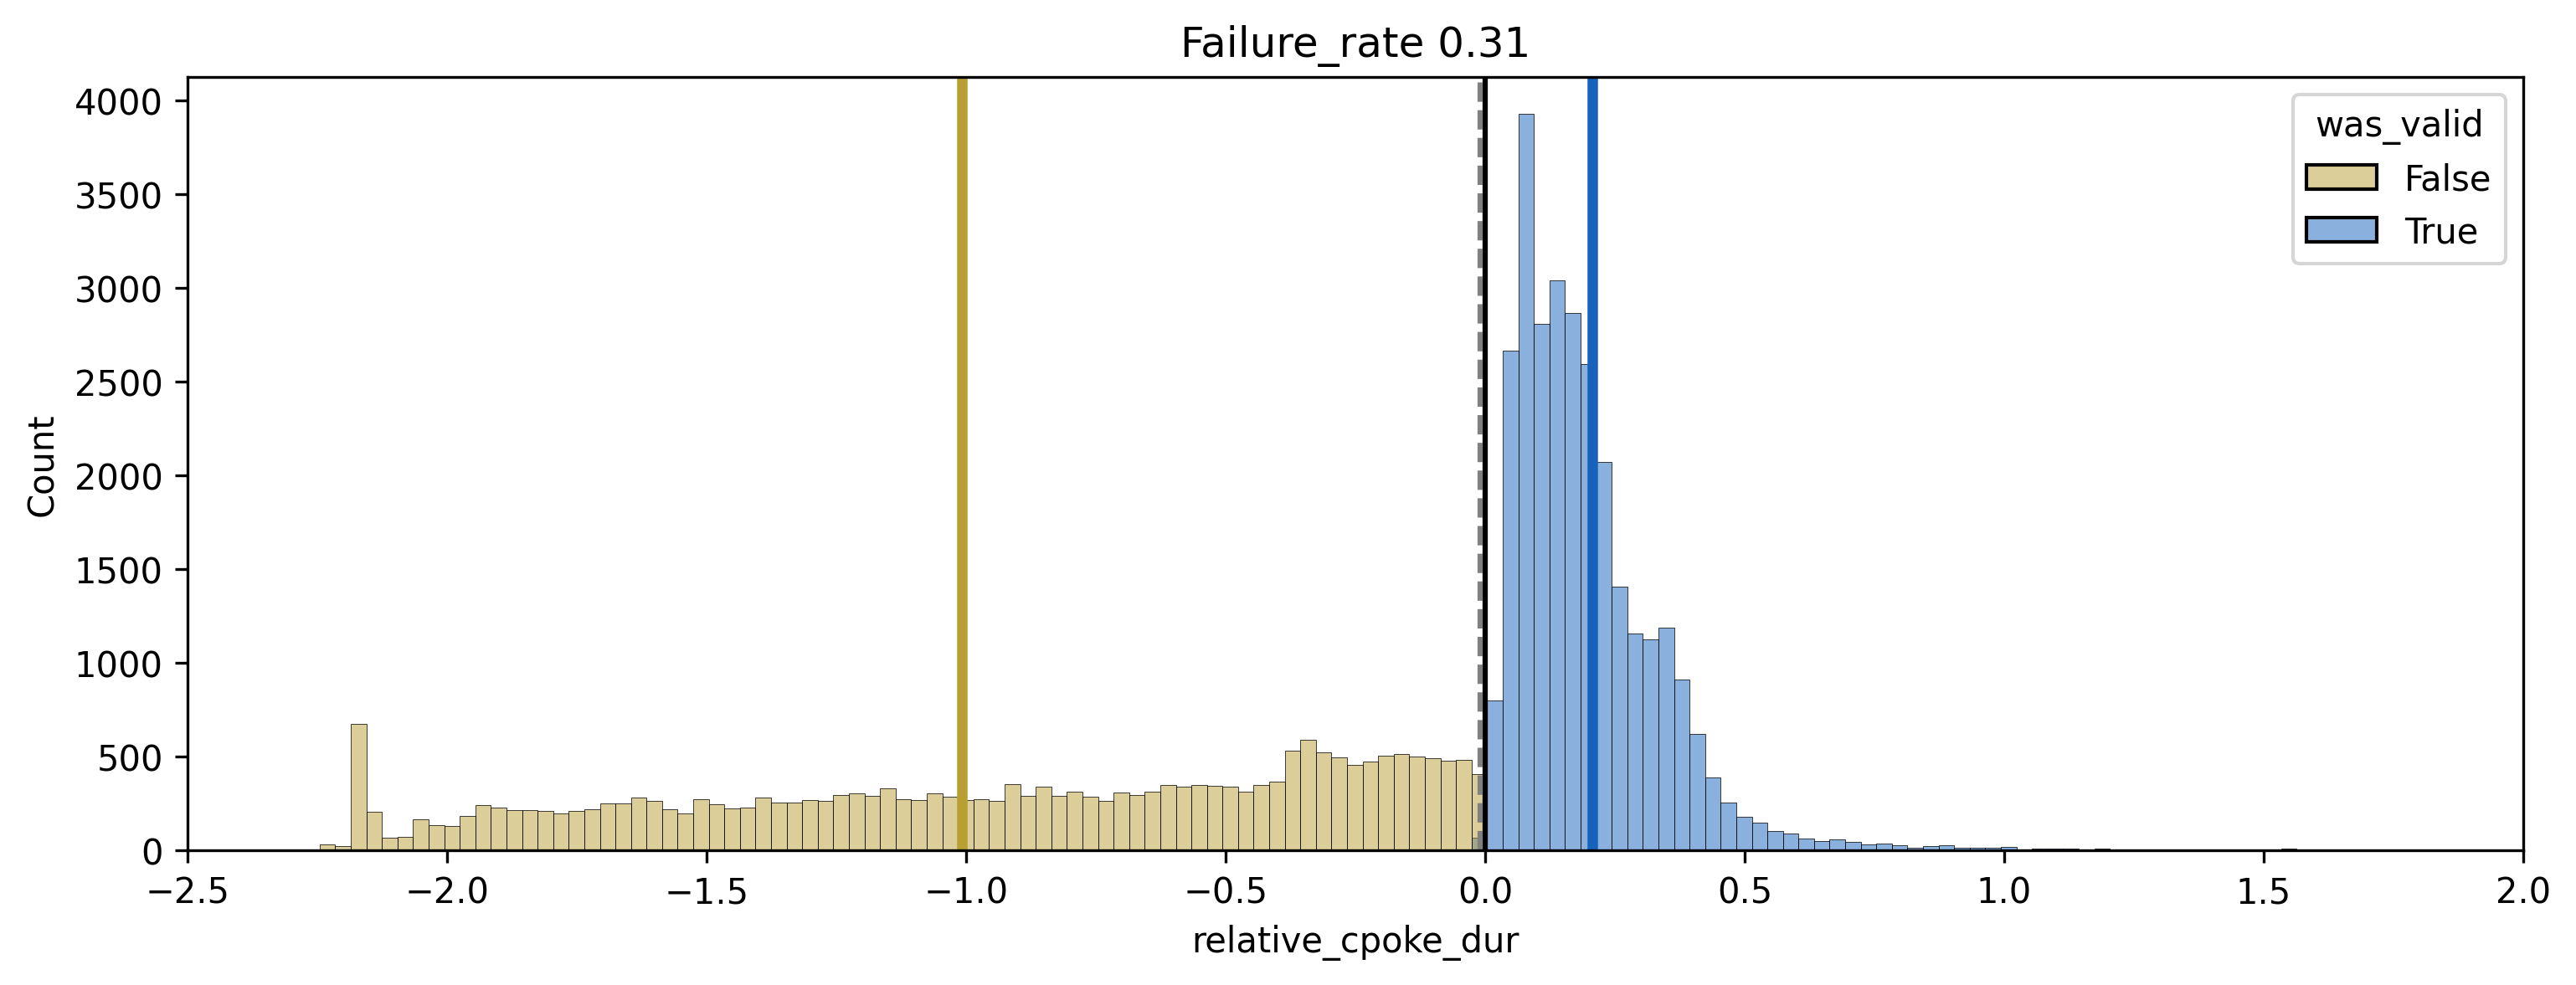

In [44]:
# pdf["relative_cpoke_dur"] = pdf["cpoke_dur"] - pdf["fixation_dur"]
# pdf["was_valid"] = (pdf["post_settling_violation"] == 0) & (
#     pdf["settling_violation"] == 0
# )
#### PLOT
fig, ax = pu.make_fig()
plot_df = pdf.copy()
pal = ["#b89f32", "#1762bd"]
sns.histplot(
    data=pdf.query("fix_experiment == 'V2' and stage >=5 and stage <8"),
    x="relative_cpoke_dur",
    binwidth=0.03,
    hue="was_valid",
    palette=pal,
    hue_order=[False, True],
    ax=ax,
)
failure_rate = 1 - pdf.was_valid.mean()
avg_failed_dur = plot_df.query("was_valid == False").relative_cpoke_dur.mean()
ax.axvline(avg_failed_dur, color=pal[0], lw=3, label="Avg Failed Duration")
avg_valid_dur = plot_df.query("was_valid == True").relative_cpoke_dur.mean()
ax.axvline(avg_valid_dur, color=pal[1], lw=3, label="Avg Valid Duration")
ax.axvline(0, color="k")
ax.axvline(0 - pdf.fixation_dur.min(), color="gray", ls="--")

ax.set_xlim(-2.5, 2)
ax.set_title(f"Failure_rate {failure_rate:.2f}")

Text(0.5, 1.0, 'Failure_rate 0.31')

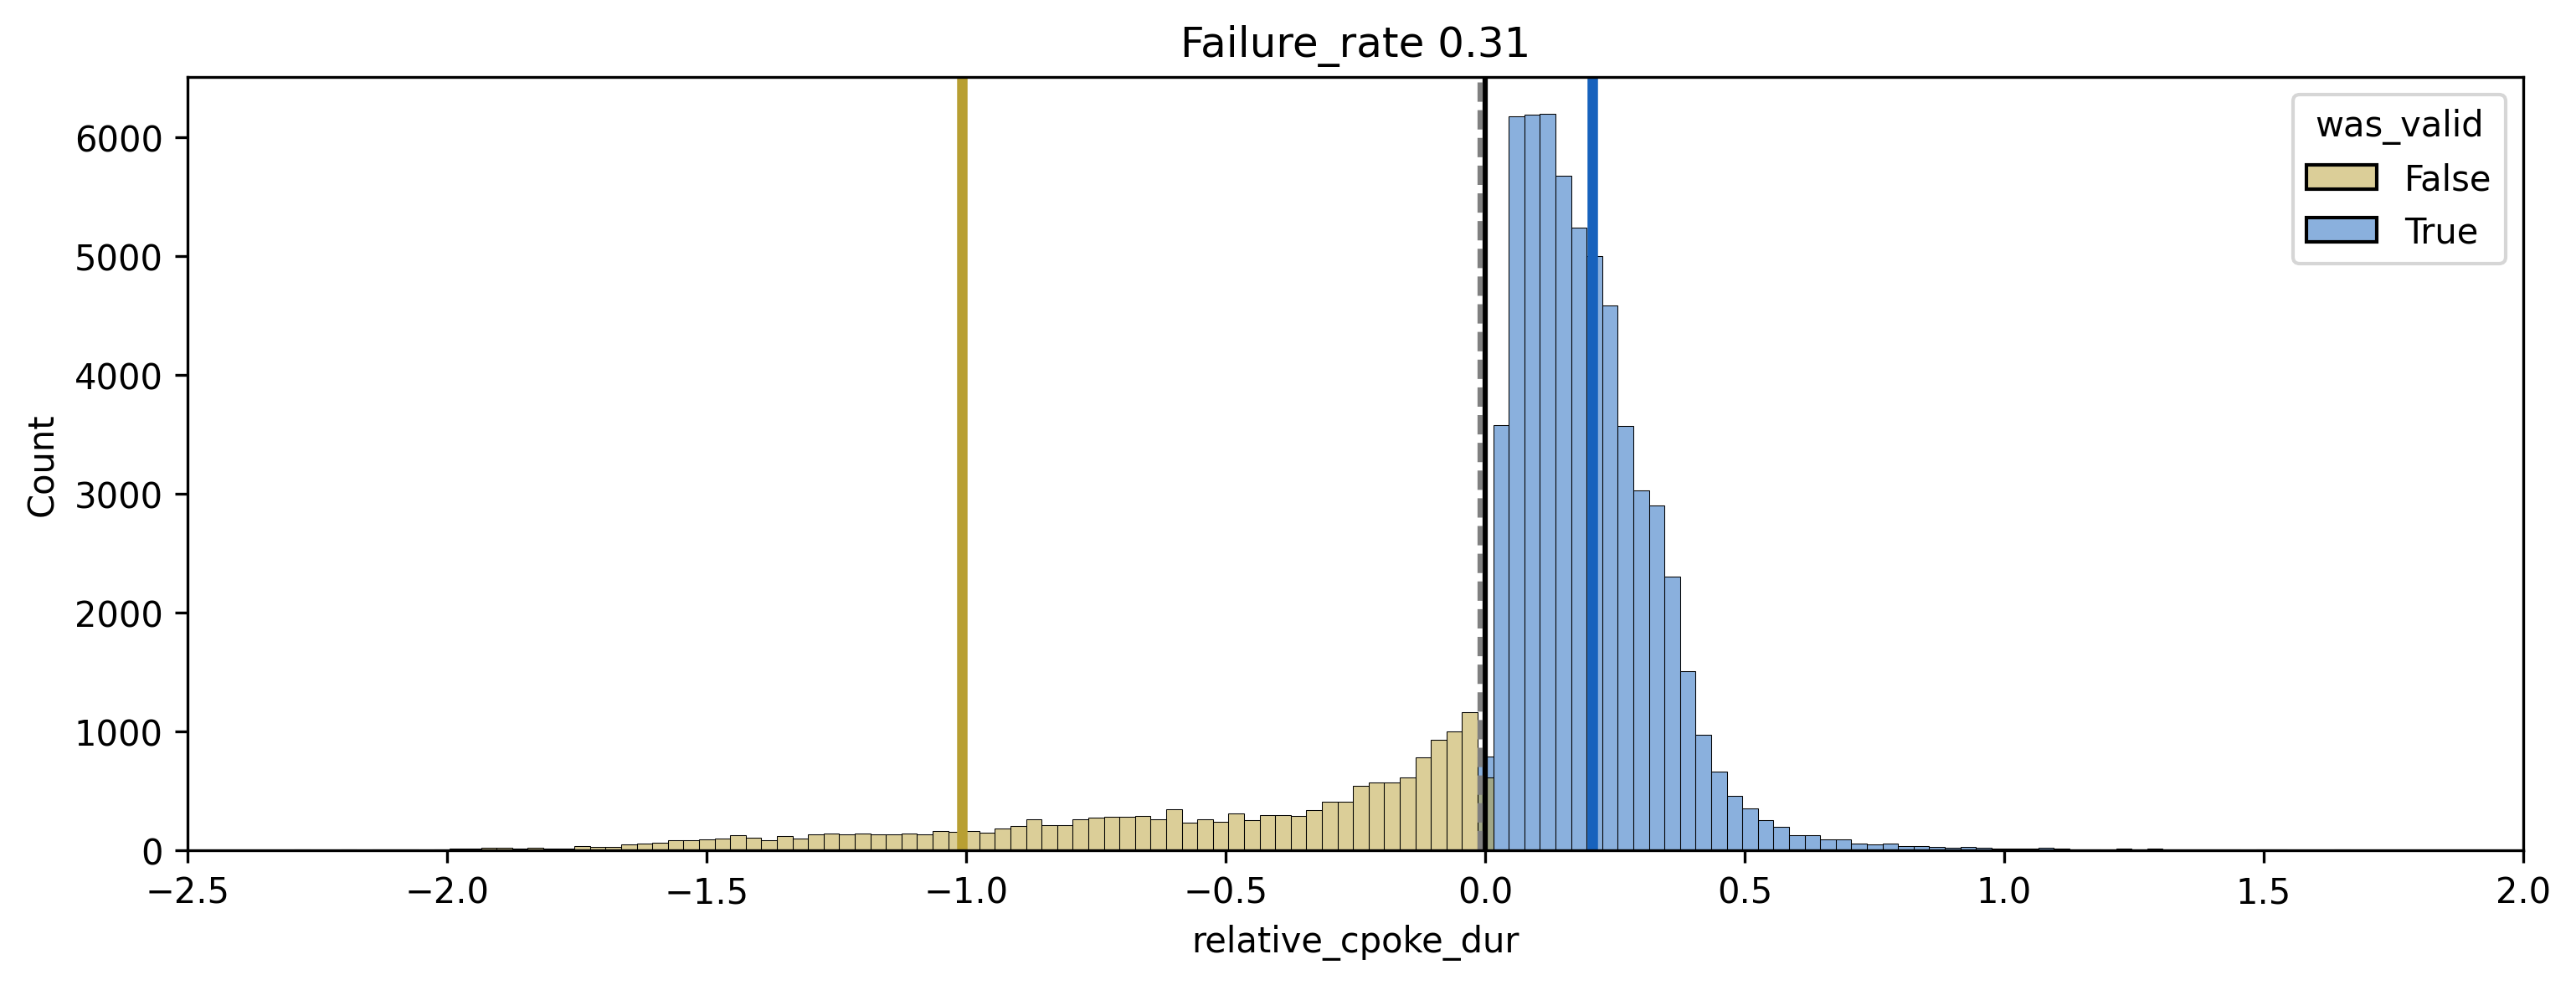

In [45]:
# pdf["relative_cpoke_dur"] = pdf["cpoke_dur"] - pdf["fixation_dur"]
# pdf["was_valid"] = (pdf["post_settling_violation"] == 0) & (
#     pdf["settling_violation"] == 0
# )
#### PLOT
fig, ax = pu.make_fig()
plot_df = pdf.copy()
pal = ["#b89f32", "#1762bd"]
sns.histplot(
    data=pdf.query("fix_experiment == 'V1' and stage >=5 and stage <8"),
    x="relative_cpoke_dur",
    binwidth=0.03,
    hue="was_valid",
    palette=pal,
    hue_order=[False, True],
    ax=ax,
)
failure_rate = 1 - pdf.was_valid.mean()
avg_failed_dur = plot_df.query("was_valid == False").relative_cpoke_dur.mean()
ax.axvline(avg_failed_dur, color=pal[0], lw=3, label="Avg Failed Duration")
avg_valid_dur = plot_df.query("was_valid == True").relative_cpoke_dur.mean()
ax.axvline(avg_valid_dur, color=pal[1], lw=3, label="Avg Valid Duration")
ax.axvline(0, color="k")
ax.axvline(0 - pdf.fixation_dur.min(), color="gray", ls="--")

ax.set_xlim(-2.5, 2)
ax.set_title(f"Failure_rate {failure_rate:.2f}")

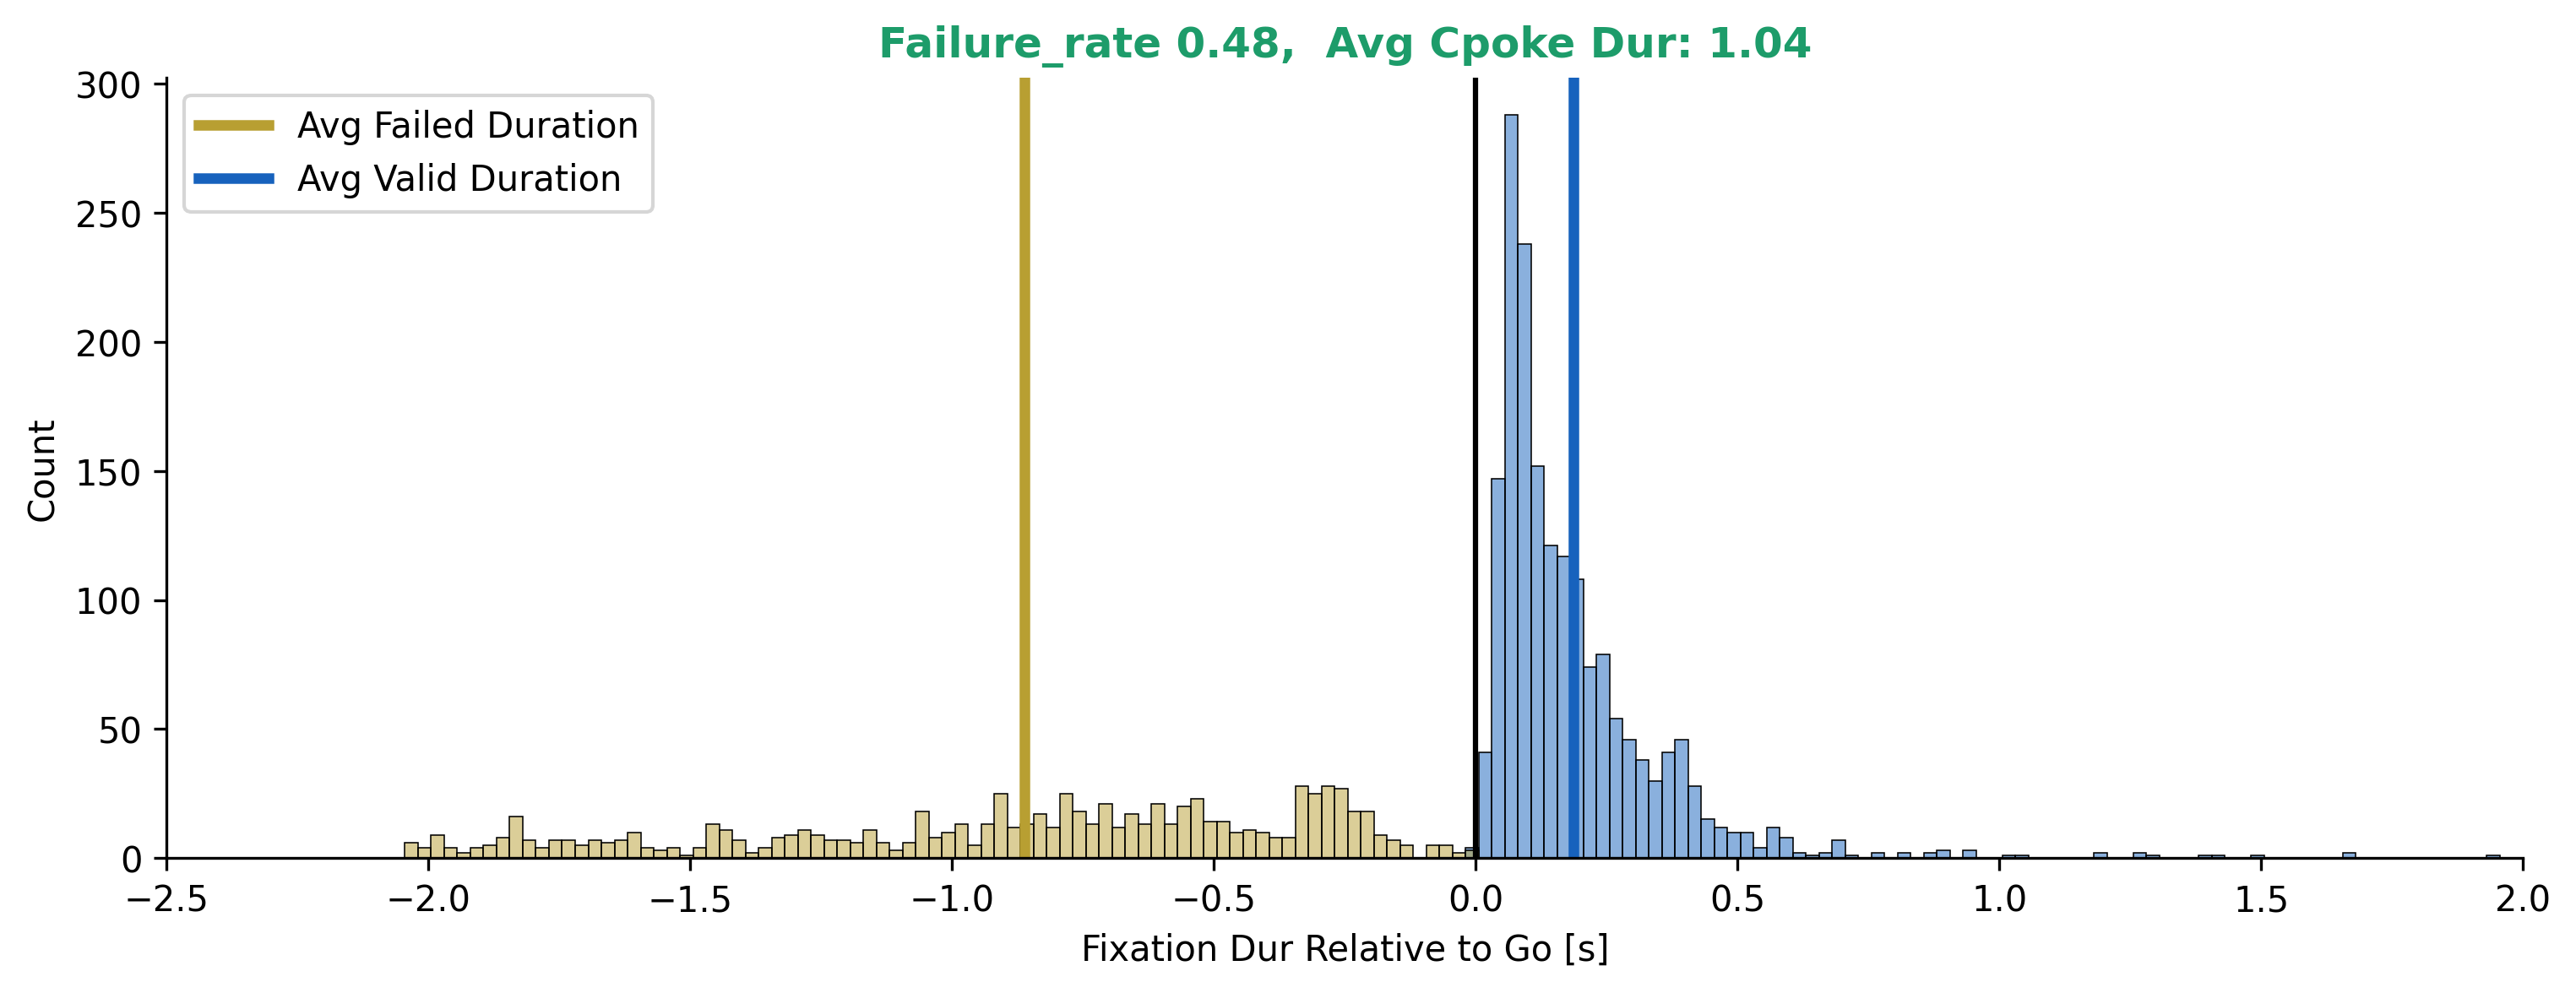

In [38]:
fix_exp = "V2"
sub_df = t.query("animal_id == 'R041' and stage >=5 and stage < 8").copy()
fig, ax = pu.make_fig()
plot_df = sub_df.copy()
viz.FixationGrower.plots.plot_cpoke_dur_distributions_prettier(
    plot_df,
    xmin=-2.5,
    xmax=2,
    title_color=pu.ALPHA_V1_color if fix_exp == "V1" else pu.ALPHA_V2_color,
    ax=ax,
)
sns.despine()

## ITI


Text(0.5, 0, 'Inter Center Poke Interval [s]')

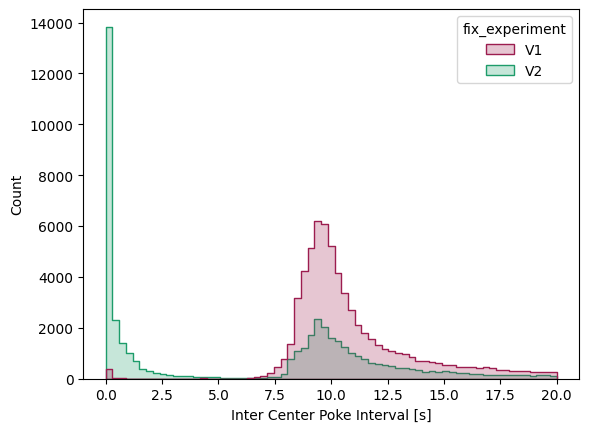

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.histplot(
    data=pdf.query("cpoke_iti < 20 and stage <8"),
    x="cpoke_iti",
    hue="fix_experiment",
    binwidth=0.3,
    element="step",
    hue_order=["V1", "V2"],
    palette=c.EXP_PALETTE,
)
plt.xlabel("Inter Center Poke Interval [s]")